# 이혼건수 fbporphet 1

In [ ]:
pip install fbprophet # 프로펫 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd # 판다스
df = pd.read_csv('/content/전국이혼건수81-20.CSV', encoding='cp949') # 데이터 로드

In [ ]:
df.head()

,시간,이혼건수
0,1981년01월,1827
1,1981년02월,1687
2,1981년03월,2094
3,1981년04월,2189
4,1981년05월,2059


In [ ]:
df = df.rename(columns={'시간':'time', '이혼건수':'divorce'})
df.tail() # 이름 바꿔줬다

,time,divorce
475,2020년08월,8455
476,2020년09월,9536
477,2020년10월,9347
478,2020년11월,8876
479,2020년12월,9181


In [ ]:
df["time"] = df["time"].str.replace(pat=r'년', repl=r'-', regex=True) # 한글 지워줬다

In [ ]:
df["time"] = df["time"].str.replace(pat=r'월', repl=r'', regex=True) # 한글 지워줬다

In [ ]:
df.head()

,time,divorce
0,1981-01,1827
1,1981-02,1687
2,1981-03,2094
3,1981-04,2189
4,1981-05,2059


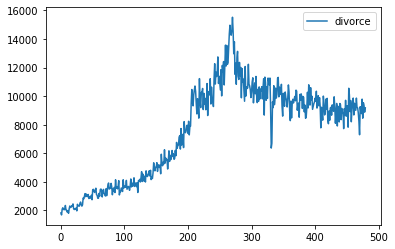

In [ ]:
from matplotlib import pyplot # 맷플롯립으로 이혼건수를 그려봤다
df.plot()
pyplot.show() # 이쁘다

In [ ]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds']) # 프로펫은 변수 이름을 ds, y 로 맞춰줘야 한단다

In [ ]:
from fbprophet import Prophet # 프로펫
model = Prophet() # 이제부터 너는 모델이다

In [ ]:
model.fit(df) # 학습

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
last_1year = list() # 마지막 년도인 2020년의 12개의 달을 모으려고 한다 
for i in range(1, 13):
  last_1year.append(['2020-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds']) # 남에 꺼 따라했다

# 미래나 과거를 예측해보기 전 학습으로 사용한 데이터를 잘 예측하는지 확인해야 한단다
# in_sample_forecast라고 한다는데, 즉 train_set을 잘 예측하냐 보는거다

In [ ]:
forecast = model.predict(last_1year) # 모은 2020년을 예측해보라 하고 forecast에 저장했다

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()) 
# 뭐가 많은데 4가지 컬럼만 보겠다

          ds         yhat   yhat_lower    yhat_upper
0 2020-01-01  8586.766666  7687.590667   9470.451407
1 2020-02-01  8377.597479  7513.765479   9327.674198
2 2020-03-01  9229.434370  8325.732968  10199.933549
3 2020-04-01  8596.254732  7747.108811   9475.867624
4 2020-05-01  9009.136585  8172.999769   9915.385098


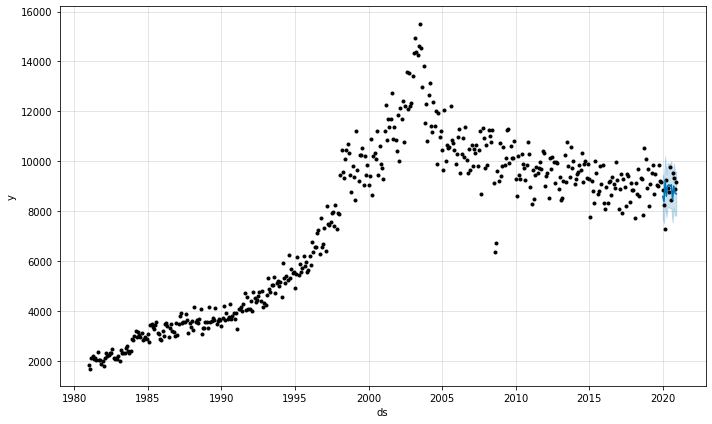

In [ ]:
model.plot(forecast)
pyplot.show()
# 프로펫은 내장함수 plot()가 있어서 좋다
# 검은점은 실제 데이터고 파란선이 예측값인데 엄청 잘 맞춘듯

In [ ]:
last_1year1 = list() # 이번엔 임의의 날짜 2021년 12달을 만든다
for i in range(1, 13):
  last_1year1.append(['2021-%02d' % i])
last_1year1 = pd.DataFrame(last_1year1, columns = ['ds'])
last_1year1['ds'] = pd.to_datetime(last_1year1['ds'])

# out_of_sample_forecast라고 한다는데, 그냥 21년 예측하는거다

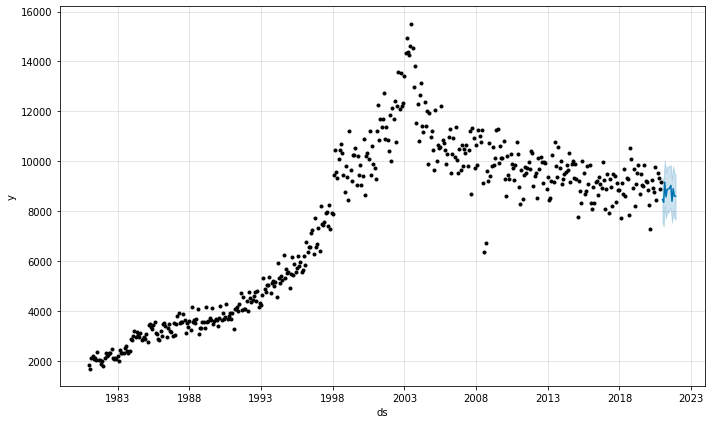

In [ ]:
forecast1 = model.predict(last_1year1)
model.plot(forecast1)
pyplot.show()
# 대충 잘 맞춘듯, 점이 많으니까 그냥 용과같아서 이쁘다

In [ ]:
forecast1['yhat']

0     8467.512964
1     8357.186269
2     9159.679609
3     8573.776216
4     8870.620456
5     8886.345053
6     8927.835339
7     9026.262933
8     8393.378200
9     8897.446493
10    8601.010080
11    8596.157330
Name: yhat, dtype: float64

In [ ]:
data2021 = [8371, 7757, 9074, 9039, 8445, 8741, 8306, 8376, 8365, 7704, 8770, 8725]
# https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B8000G&conn_path=I2

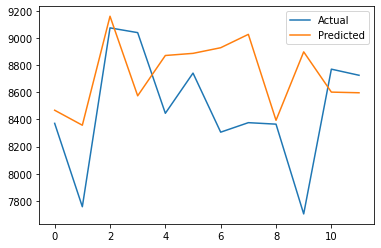

In [ ]:
pyplot.plot(data2021, label='Actual')
pyplot.plot(forecast1['yhat'], label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
# 이번에는 다르게 마지막 1년을 제외한 값으로 학습을 하고 마지막 1년을 예측한 뒤 
# 실제 마지막 1년과 비교하려고 한다 

# 마지막 12개월 제외시키기 
train = df.drop(df.index[-12:]) # train에서 뒤에 12개 제외
y_true = df['y'][-12:].values # 제외한 값은 y_true로 저장해둔다

# 모델 생성 후 학습
model = Prophet()
model.fit(train) # 12개가 빠진 train으로 학습

# 가상의 마지막 12개월 생성
last_1year = list()
for i in range(1, 13):
  last_1year.append(['2020-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds']) # 실제 값이 들은게 아니다 !

# 예측, 비교하기 그리고 MAE를 살펴보기
forecast = model.predict(last_1year)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 612.731


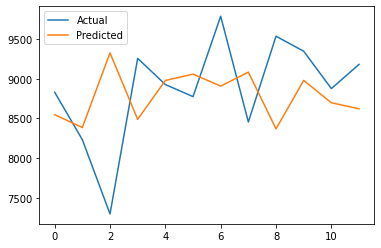

In [ ]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()
# MAE 612.731 잘 맞춘 듯 하다

In [ ]:
last_1year2 = list() # 이번엔 임의의 날짜 2022년 12달을 만든다
for i in range(1, 13):
  last_1year2.append(['2022-%02d' % i])
last_1year2 = pd.DataFrame(last_1year2, columns = ['ds'])
last_1year2['ds'] = pd.to_datetime(last_1year2['ds'])

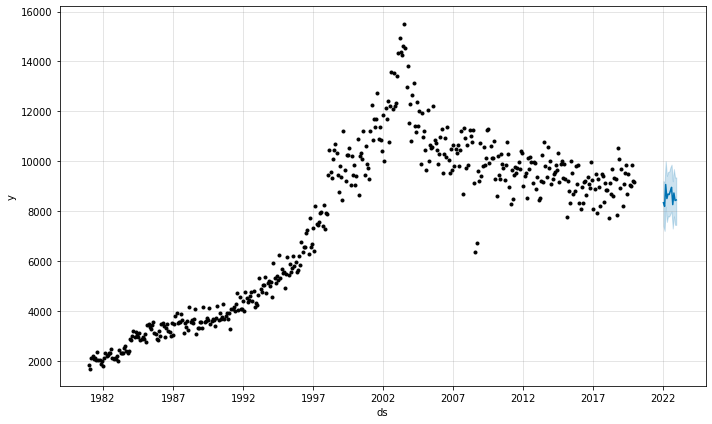

In [ ]:
forecast2 = model.predict(last_1year2)
model.plot(forecast2)
pyplot.show()

In [ ]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,8641.004670,7400.876058,9205.408625,8487.630477,8804.249777,-304.525491,-304.525491,-304.525491,-304.525491,-304.525491,-304.525491,0.0,0.0,0.0,8336.479180
1,2022-02-01,8632.691438,7204.444253,9150.444133,8470.702073,8811.004580,-443.635239,-443.635239,-443.635239,-443.635239,-443.635239,-443.635239,0.0,0.0,0.0,8189.056199
2,2022-03-01,8625.182712,8173.656261,10004.555234,8447.495819,8817.458455,443.245750,443.245750,443.245750,443.245750,443.245750,443.245750,0.0,0.0,0.0,9068.428462
3,2022-04-01,8616.869480,7565.387556,9412.873733,8425.953101,8827.321843,-114.119200,-114.119200,-114.119200,-114.119200,-114.119200,-114.119200,0.0,0.0,0.0,8502.750280
4,2022-05-01,8608.824417,7803.011627,9573.212444,8411.110504,8834.209114,75.808656,75.808656,75.808656,75.808656,75.808656,75.808656,0.0,0.0,0.0,8684.633073
5,2022-06-01,8600.511184,7781.338306,9583.759112,8391.732133,8836.408037,65.011706,65.011706,65.011706,65.011706,65.011706,65.011706,0.0,0.0,0.0,8665.522890
6,2022-07-01,8592.466121,7888.201715,9752.178912,8369.890142,8837.291724,212.124401,212.124401,212.124401,212.124401,212.124401,212.124401,0.0,0.0,0.0,8804.590522
7,2022-08-01,8584.152889,7984.310377,9862.350803,8346.740701,8843.867330,368.232679,368.232679,368.232679,368.232679,368.232679,368.232679,0.0,0.0,0.0,8952.385567
8,2022-09-01,8575.839657,7300.849834,9197.184567,8328.852335,8853.060027,-315.428443,-315.428443,-315.428443,-315.428443,-315.428443,-315.428443,0.0,0.0,0.0,8260.411214
9,2022-10-01,8567.794593,7789.393620,9685.543134,8305.549138,8854.109809,157.552314,157.552314,157.552314,157.552314,157.552314,157.552314,0.0,0.0,0.0,8725.346907


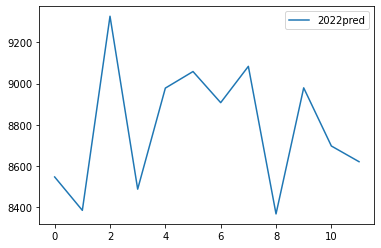

In [ ]:
pyplot.plot(forecast['yhat'], label='2022pred')
pyplot.legend()
pyplot.show()

# 2023년 예측

In [ ]:
last_1year3 = list() # 이번엔 임의의 날짜 2023년 12달을 만든다
for i in range(1, 13):
  last_1year3.append(['2023-%02d' % i])
last_1year3 = pd.DataFrame(last_1year3, columns = ['ds'])
last_1year3['ds'] = pd.to_datetime(last_1year3['ds'])

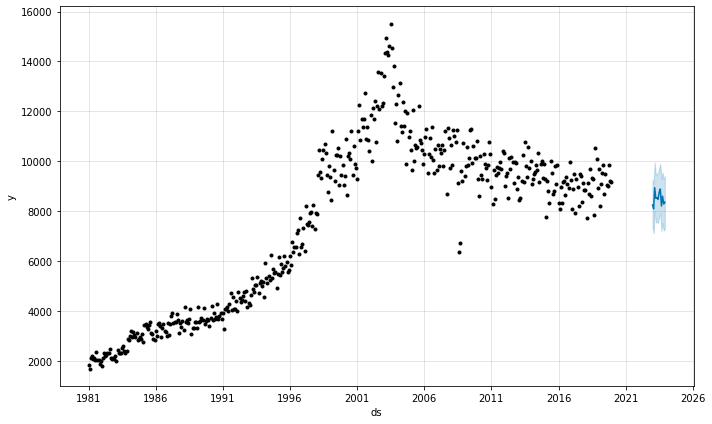

In [ ]:
forecast3 = model.predict(last_1year3)
model.plot(forecast3)
pyplot.show()

In [ ]:
forecast3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,8543.123065,7353.331547,9266.615485,8216.157230,8871.374335,-297.270532,-297.270532,-297.270532,-297.270532,-297.270532,-297.270532,0.0,0.0,0.0,8245.852534
1,2023-02-01,8534.809833,7106.868093,9103.019391,8196.982015,8877.577893,-443.540061,-443.540061,-443.540061,-443.540061,-443.540061,-443.540061,0.0,0.0,0.0,8091.269772
2,2023-03-01,8527.301107,8010.919959,9959.950159,8181.030497,8886.569379,413.381076,413.381076,413.381076,413.381076,413.381076,413.381076,0.0,0.0,0.0,8940.682183
3,2023-04-01,8518.987875,7545.337590,9458.364882,8162.786198,8897.580622,-9.664066,-9.664066,-9.664066,-9.664066,-9.664066,-9.664066,0.0,0.0,0.0,8509.323809
4,2023-05-01,8510.942811,7557.983576,9488.317678,8141.827787,8901.836174,23.357565,23.357565,23.357565,23.357565,23.357565,23.357565,0.0,0.0,0.0,8534.300377
5,2023-06-01,8502.629579,7529.175786,9536.924749,8109.158953,8898.668733,-31.841973,-31.841973,-31.841973,-31.841973,-31.841973,-31.841973,0.0,0.0,0.0,8470.787606
6,2023-07-01,8494.584516,7743.003704,9721.376371,8073.992573,8898.992244,261.729221,261.729221,261.729221,261.729221,261.729221,261.729221,0.0,0.0,0.0,8756.313737
7,2023-08-01,8486.271283,7913.604956,9898.195180,8043.426110,8910.218431,400.843581,400.843581,400.843581,400.843581,400.843581,400.843581,0.0,0.0,0.0,8887.114865
8,2023-09-01,8477.958051,7197.461246,9287.668605,8023.072652,8924.617319,-272.622449,-272.622449,-272.622449,-272.622449,-272.622449,-272.622449,0.0,0.0,0.0,8205.335602
9,2023-10-01,8469.912988,7520.603510,9550.031614,8002.591948,8943.747275,126.348844,126.348844,126.348844,126.348844,126.348844,126.348844,0.0,0.0,0.0,8596.261832


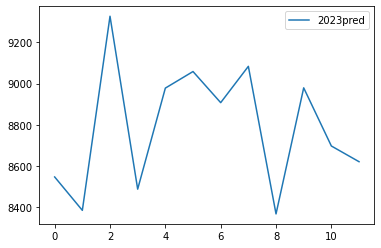

In [ ]:
pyplot.plot(forecast['yhat'], label='2023pred')
pyplot.legend()
pyplot.show()